# **Task:**
---

Assignment on implementing multi-precision arithmetic and evaluating its efficiency.

# **Libraries:**

---

In [ ]:
import random
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import time

# **Addition:**

---

Lets first define `add_mac()` to add two digits with base constraints and counts the number of calls.

- Example: `print(add_mac(6, 8))`  
  - Result: `(4, 1)` (as $6 + 8 = 14$, remainder = 4, carry = 1).



In [ ]:
base = 10
count_add = 0

def add_mac(a,b):
  if 0 <= (a and b) < base:
    global count_add
    count_add += 1

    c = a+b
    return (c%base,c//base)

  else:
    raise Exception(f"Inputs of add_mac() should be between 0 and (Base-1)={base-1}")

print(add_mac(6,8))

(4, 1)


Then implement `add1()` for recursive addition of two equal-length arrays and it also tracks `add_mac()` calls.

In [ ]:
count_add = 0

alpha=[7,4,3]
beta=[5,2,8]
def add1(alpha,beta,c):
  r,s,t=[],[],[]
  r = add_mac(alpha[0],beta[0])
  s = add_mac(r[0],c)
  t = add_mac(r[1],s[1])
  if len(alpha) == 1:
    return [s[0],t[0]]
  return [s[0]] + add1(alpha[1:],beta[1:],t[0])

print(add1(alpha,beta,c=0))
print(count_add)

[2, 7, 1, 1]
9


As we can see in the above example:
- Input: `alpha = [7, 4, 3]`, `beta = [5, 2, 8]`  
- Example: `add1(alpha, beta, c=0)`  
  - Result: `[2, 7, 1, 1]` $( 347 + 825 = 1172)$.  
- Calls to `add_mac()`: `9`.

Finally defining `add()` to handle addition of arrays with different lengths by padding shorter arrays with zeros.

In [ ]:
count_add = 0

alpha=[4,7,5,1,6]
beta=[9,2,8]
def add(alpha,beta):
  la,lb = len(alpha),len(beta)
  l = max(la,lb)
  alpha = alpha + (l-la)*[0]
  beta = beta + (l-lb)*[0]
  return add1(alpha,beta,0)

print(add(alpha,beta))
print(count_add)

[3, 0, 4, 2, 6, 0]
15


So from the above example:
- Input: `alpha = [4, 7, 5, 1, 6]`, `beta = [9, 2, 8]`  
- Example: `print(add(alpha, beta))`  
  - Result: `[3, 0, 4, 2, 6, 0]` $(61574 + 829 = 62403)$.  
- Calls to `add_mac()`: `15`.

Now I have defined a `generate_data(n)` function which generates a dataset of random number pairs with ascending lengths for performance testing. Its pair lengths grow from 1 digit to n digits. I can easily change variable n to any large number without having to manually put the samples. I will use the same data in `mul()` also.

In [ ]:
def generate_data(n):
    data = []
    for i in range(1, n + 1):
        alpha = [random.randint(0, base - 1) for j in range(i)]
        beta = [random.randint(0, base - 1) for j in range(i)]
        data.append((alpha, beta))
    return data

data = generate_data(30)
print(data)

[([9], [1]), ([6, 9], [1, 3]), ([3, 9, 7], [1, 2, 5]), ([3, 9, 3, 0], [3, 2, 5, 7]), ([1, 4, 9, 8, 5], [4, 6, 7, 2, 6]), ([7, 4, 8, 7, 6, 4], [5, 3, 1, 9, 3, 1]), ([9, 4, 3, 3, 0, 0, 2], [0, 6, 8, 9, 4, 9, 7]), ([0, 3, 7, 9, 1, 6, 7, 1], [9, 9, 3, 3, 4, 6, 9, 0]), ([9, 0, 8, 2, 6, 6, 2, 1, 2], [1, 5, 8, 7, 0, 0, 3, 3, 6]), ([4, 8, 4, 5, 7, 8, 5, 2, 0, 8], [7, 5, 6, 7, 5, 6, 6, 7, 0, 8]), ([9, 6, 4, 6, 5, 5, 7, 9, 7, 0, 1], [2, 0, 4, 6, 7, 3, 4, 0, 6, 1, 2]), ([0, 4, 7, 9, 1, 5, 1, 4, 2, 5, 7, 3], [7, 2, 3, 5, 3, 4, 9, 8, 9, 1, 3, 8]), ([5, 7, 2, 2, 5, 7, 6, 0, 2, 6, 4, 7, 7], [1, 5, 9, 0, 8, 0, 5, 3, 8, 2, 9, 2, 2]), ([4, 4, 8, 6, 9, 0, 7, 5, 8, 5, 9, 9, 3, 0], [4, 6, 7, 6, 9, 0, 0, 2, 4, 8, 5, 1, 3, 3]), ([5, 3, 1, 4, 7, 4, 4, 7, 9, 2, 4, 1, 8, 6, 6], [1, 7, 5, 8, 4, 3, 0, 6, 0, 4, 2, 9, 6, 2, 3]), ([2, 4, 7, 3, 8, 9, 2, 9, 8, 4, 7, 6, 6, 0, 7, 2], [7, 1, 1, 7, 1, 8, 5, 5, 5, 2, 4, 3, 9, 5, 9, 7]), ([4, 2, 6, 9, 5, 1, 6, 9, 4, 8, 9, 1, 6, 1, 5, 2, 8], [0, 5, 6, 1, 9, 5, 6, 3, 3, 7, 6,

Now lets used the generated data in `add_calls_time(data)` function which computes `add_mac()` calls and time taken for additions, generates a table, and plots results for calls and time vs length.

╒════╤══════════╤═══════════════════╤═════════════╕
│    │   Length │   add_mac() calls │        Time │
╞════╪══════════╪═══════════════════╪═════════════╡
│  0 │        1 │                 3 │ 1.00136e-05 │
├────┼──────────┼───────────────────┼─────────────┤
│  1 │        2 │                 6 │ 6.19888e-06 │
├────┼──────────┼───────────────────┼─────────────┤
│  2 │        3 │                 9 │ 8.82149e-06 │
├────┼──────────┼───────────────────┼─────────────┤
│  3 │        4 │                12 │ 7.39098e-06 │
├────┼──────────┼───────────────────┼─────────────┤
│  4 │        5 │                15 │ 8.82149e-06 │
├────┼──────────┼───────────────────┼─────────────┤
│  5 │        6 │                18 │ 1.07288e-05 │
├────┼──────────┼───────────────────┼─────────────┤
│  6 │        7 │                21 │ 1.12057e-05 │
├────┼──────────┼───────────────────┼─────────────┤
│  7 │        8 │                24 │ 1.3113e-05  │
├────┼──────────┼───────────────────┼─────────────┤
│  8 │      

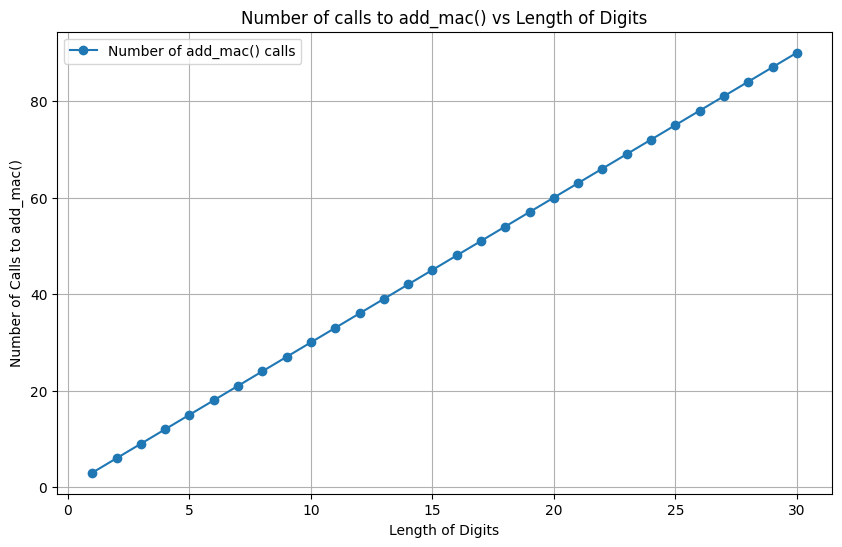

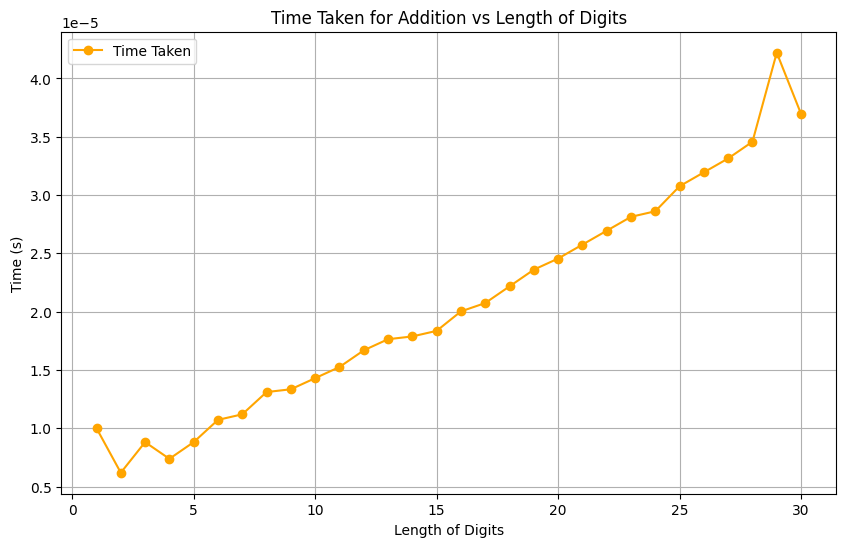

In [ ]:
def add_calls_time(data):
    results = []
    for alpha, beta in data:
        global count_add
        count_add = 0

        start_time = time.time()
        add(alpha, beta)
        end_time = time.time()

        elapsed_time = end_time - start_time
        results.append({"Length": len(alpha), "add_mac() calls": count_add, "Time": elapsed_time})
    return pd.DataFrame(results)

results_add = add_calls_time(data)
print(tabulate(results_add, headers="keys", tablefmt="fancy_grid"))

# Plotting add_mac() calls vs Length
plt.figure(figsize=(10, 6))
plt.plot(results_add["Length"], results_add["add_mac() calls"], marker="o", label="Number of add_mac() calls")
plt.title("Number of calls to add_mac() vs Length of Digits")
plt.xlabel("Length of Digits")
plt.ylabel("Number of Calls to add_mac()")
plt.grid()
plt.legend()
plt.show()

# Plotting Time vs Length
plt.figure(figsize=(10, 6))
plt.plot(results_add["Length"], results_add["Time"], marker="o", color="orange", label="Time Taken")
plt.title("Time Taken for Addition vs Length of Digits")
plt.xlabel("Length of Digits")
plt.ylabel("Time (s)")
plt.grid()
plt.legend()
plt.show()

### **Observation: Count and Time Complexity of `add()`**

When both numbers have the same digit length \( n \), each digit requires exactly 3 calls to `add_mac()` for addition, carry propagation, and overflow handling. Thus, the total calls are given by:  
$$ \text{Total Calls} = 3 \cdot n $$  
Since `add_mac()` operates in constant time, the overall time complexity is:  
$$ T(n) = O(n) $$  

For numbers with different lengths \( n \) and \( m \) $( n > m )$, the shorter number is zero-padded to match the longer one. After padding, the effective length becomes $ \max(n, m) $, and the total calls are:  
$$ \text{Total Calls} = 3 \cdot \max(n, m) $$  
The time complexity similarly depends on the longer number:  
$$ T(n, m) = O(\max(n, m)) $$  

In both cases, the complexity is linear due to digit-by-digit processing.


# **Multiplication:**
---

Now we will generate similar functions for multiplication. Starting `mul_mac()` for single digit-wise multiply.

In [ ]:
base = 10
count_mul = 0

def mul_mac(a,b):
  if 0 <= (a and b) < base:
    global count_mul
    count_mul += 1

    c = a*b
    return (c%base,c//base)

  else:
    raise Exception(f"Inputs of mul_mac() should be between 0 and (Base-1)={base-1}")

print(mul_mac(4,9))

(6, 3)


Which is correct as (4*9 = 36).

Then defining `mul1()` for multiplication of an array (number with length $> 1$) with a single digit number.

In [ ]:
count_mul = 0

a = 3
beta = [5,2,8]

def mul1(a,beta,c):
  r,s,t=[],[],[]
  r = mul_mac(a,beta[0])
  s = add_mac(r[0],c)
  t = add_mac(r[1],s[1])
  if len(beta)==1:
    return [s[0], t[0]]
  else:
    return [s[0]]+mul1(a,beta[1:],t[0])

print(mul1(a,beta,c=0))
print(count_mul)

[5, 7, 4, 2]
3


Which is also true as $(825 \times 3 = 2475)$. Number of `mul_mac()` calls = 3.

Now finally define `mul()` for multiplication of 2 arrays (or 2 numbers with different digits length).

In [ ]:
count_mul = 0

alpha=[9,7,2,1]
beta=[8,7,3]

def mul(alpha,beta):
  r = mul1(alpha[0],beta,0)
  if len(alpha) == 1:
    return r
  s = [0] + mul(alpha[1:],beta)
  return add(r,s)

print(mul(alpha,beta))
print(count_mul)

[2, 6, 4, 3, 8, 4, 0, 0, 0, 0]
12


Which is also correct as $1279 \times 378 = 483462.$ Number of times `mul_mac()` called = 12.

Now lets use the data (which we generated earlier), in `mul_calls_time(data)` function which computes `mul_mac()` and `add_mac()` calls and time taken for multiplication, generates a table, and plots results for calls and time vs length.

╒════╤══════════╤═══════════════════╤═══════════════════╤═════════════╕
│    │   Length │   mul_mac() calls │   add_mac() calls │        Time │
╞════╪══════════╪═══════════════════╪═══════════════════╪═════════════╡
│  0 │        1 │                 1 │                 2 │ 1.0252e-05  │
├────┼──────────┼───────────────────┼───────────────────┼─────────────┤
│  1 │        2 │                 4 │                20 │ 5.31673e-05 │
├────┼──────────┼───────────────────┼───────────────────┼─────────────┤
│  2 │        3 │                 9 │                54 │ 5.126e-05   │
├────┼──────────┼───────────────────┼───────────────────┼─────────────┤
│  3 │        4 │                16 │               104 │ 8.70228e-05 │
├────┼──────────┼───────────────────┼───────────────────┼─────────────┤
│  4 │        5 │                25 │               170 │ 0.000144005 │
├────┼──────────┼───────────────────┼───────────────────┼─────────────┤
│  5 │        6 │                36 │               252 │ 0.0001

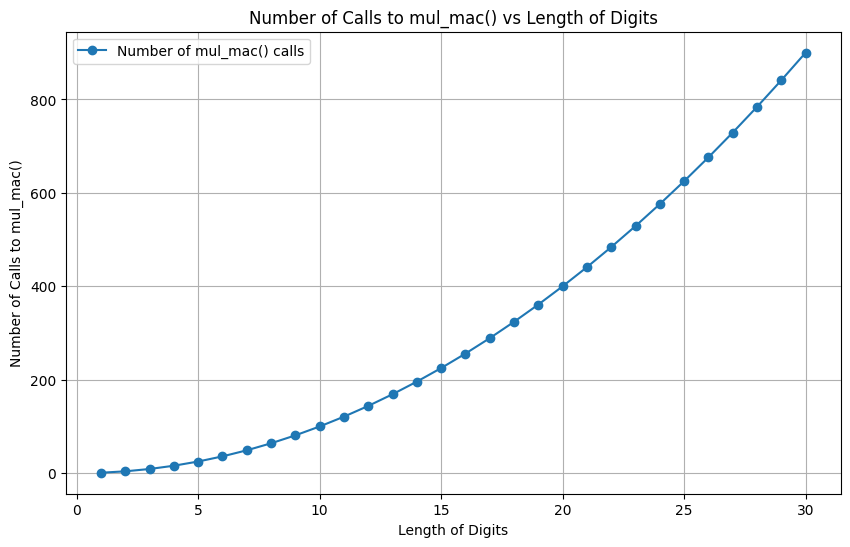

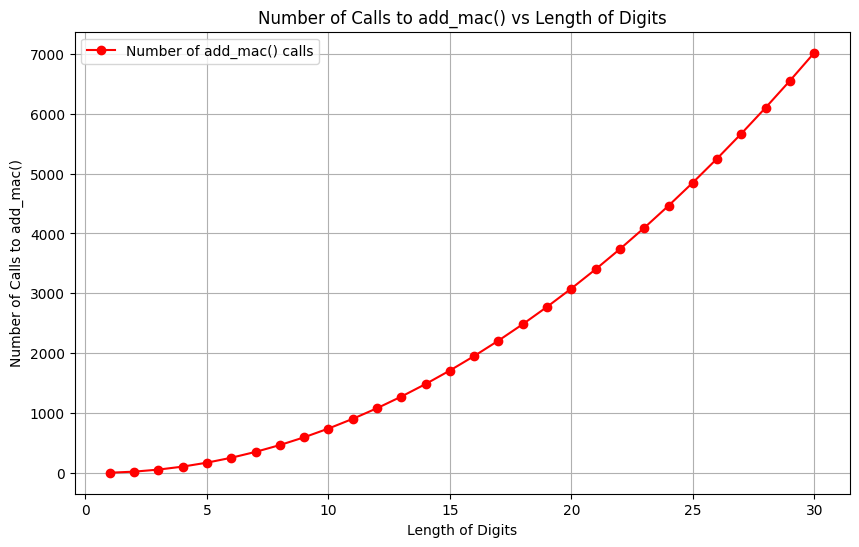

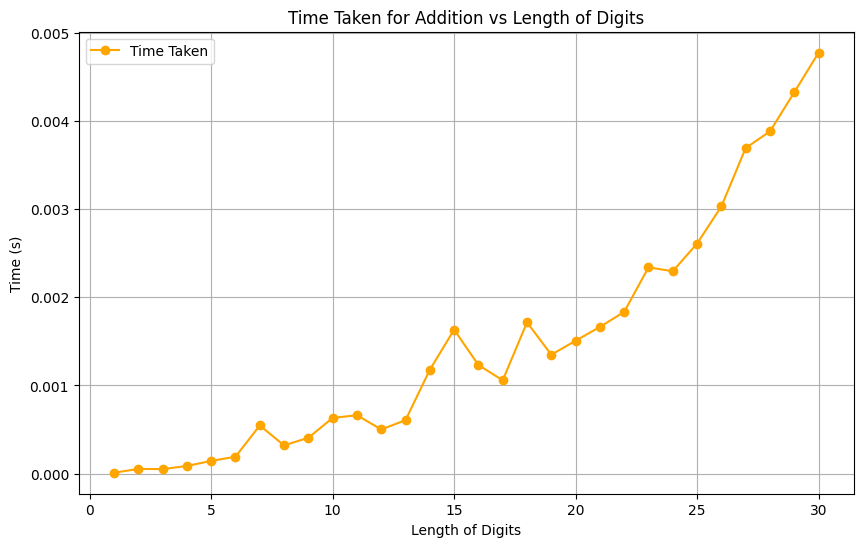

In [ ]:
def mul_calls_time(data):
    results = []
    for alpha, beta in data:
        global count_mul
        count_mul = 0
        global count_add
        count_add = 0

        start_time = time.time()
        mul(alpha, beta)
        end_time = time.time()

        elapsed_time = end_time - start_time
        results.append({"Length": len(alpha), "mul_mac() calls": count_mul, "add_mac() calls": count_add, "Time": elapsed_time})
    return pd.DataFrame(results)

results_mul = mul_calls_time(data)
print(tabulate(results_mul, headers="keys", tablefmt="fancy_grid"))

# Plotting mul_mac() calls vs Length
plt.figure(figsize=(10, 6))
plt.plot(results_mul["Length"], results_mul["mul_mac() calls"], marker="o", label="Number of mul_mac() calls")
plt.title("Number of Calls to mul_mac() vs Length of Digits")
plt.xlabel("Length of Digits")
plt.ylabel("Number of Calls to mul_mac()")
plt.grid()
plt.legend()
plt.show()

# Plotting add_mac() calls vs Length
plt.figure(figsize=(10, 6))
plt.plot(results_mul["Length"], results_mul["add_mac() calls"], marker="o", color="red", label="Number of add_mac() calls")
plt.title("Number of Calls to add_mac() vs Length of Digits")
plt.xlabel("Length of Digits")
plt.ylabel("Number of Calls to add_mac()")
plt.grid()
plt.legend()
plt.show()

# Plotting Time vs Length
plt.figure(figsize=(10, 6))
plt.plot(results_mul["Length"], results_mul["Time"], marker="o", color="orange", label="Time Taken")
plt.title("Time Taken for Addition vs Length of Digits")
plt.xlabel("Length of Digits")
plt.ylabel("Time (s)")
plt.grid()
plt.legend()
plt.show()

### **Observation: Count and Time Complexity of `mul()`**

- When both numbers have the same digit length \( n \), each digit in the first number interacts with every digit in the second number. This results in $ n \times n $ pairwise multiplications. Hence, the total calls to `mul_mac()` are:  
$$ \text{Total Calls} = n^2 $$  
Since each `mul_mac()` operates in constant time, the overall time complexity is:  
$$ T(n) = O(n^2) $$  
For numbers with different lengths \( n \) and \( m \), every digit in the longer number interacts with all digits in the shorter number. Thus, the total calls are proportional to the product of the lengths:  
$$ \text{Total Calls} = n \cdot m $$  
The time complexity is also determined by the product of the lengths:  
$$ T(n, m) = O(n \cdot m) $$  
This quadratic complexity arises because each digit in one number pairs with all digits in the other.


- In addition to the calls to `mul_mac()`, multiplication involves repeated addition, which results in calls to `add_mac()` as part of the carry propagation and summing intermediate results. The number of calls to `add_mac()` during multiplication grows non-linearly due to carry propagation and summing of intermediate results. For numbers of length  n , the growth pattern is observed as $ 2, 20, 54, 104, 170, 252, \dots $

In [ ]:
!jupyter nbconvert --to html /content/MTH407_Ass_1_MS21024.ipynb

[NbConvertApp] Converting notebook /content/MTH407_Ass_1_MS21024.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 589636 bytes to /content/MTH407_Ass_1_MS21024.html
